# Initial Analysis of Factory POS CSV
Exploration of data containted in the file utilizing Pandas library and creating plots with Seaborn to identify any potential trends within the data provided.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [190]:
fact_pos = pd.read_csv('C:\\Users\\harry\\Documents\\MGTC28H3 F\\Code\\Group Project\\kenvue_data\\Factory POS $ - UTSC Lecture.csv')

In [192]:
fact_pos.dtypes

Unnamed: 0        object
Unnamed: 1        object
Fiscal Year      float64
Fiscal Year.1    float64
Fiscal Year.2    float64
dtype: object

In [193]:
fact_pos.head()

,Unnamed: 0,Unnamed: 1,Fiscal Year,Fiscal Year.1,Fiscal Year.2
0,Need State,Fiscal Week,2021.00,2022.00,2023.00
1,Need State 1,1,317435.25,348637.50,372921.75
2,Need State 1,2,309234.75,343799.25,357329.25
3,Need State 1,3,331149.00,346592.25,352571.25
4,Need State 1,4,291885.00,344795.25,331310.25


#### Reorganizing Dataset for ease of Plotting

In [194]:
# rename column names
# declared row 0 and row 1 as header.  The data actually begins in row 2.
fact_pos.columns = fact_pos.iloc[0]
fact_pos.columns = fact_pos.columns.astype(str)
fact_pos.rename(columns={"2021.0": "2021 Factory POS", "2022.0": "2022 Factory POS", "2023.0": "2023 Factory POS"}, inplace=True)
fact_pos.columns

Index(['Need State', 'Fiscal Week', '2021 Factory POS', '2022 Factory POS',
       '2023 Factory POS'],
      dtype='object', name=0)

#
## Plotting Annual Factory POS Data for Each Week

### Identifying Factory POS Trends for Each Need State

In [195]:
fact_pos.head()

,Need State,Fiscal Week,2021 Factory POS,2022 Factory POS,2023 Factory POS
0,Need State,Fiscal Week,2021.00,2022.00,2023.00
1,Need State 1,1,317435.25,348637.50,372921.75
2,Need State 1,2,309234.75,343799.25,357329.25
3,Need State 1,3,331149.00,346592.25,352571.25
4,Need State 1,4,291885.00,344795.25,331310.25


In [196]:
# remove missing values
fact_pos = fact_pos.dropna(subset = ['2021 Factory POS', '2022 Factory POS', '2023 Factory POS'])

In [197]:
fact_n1 = fact_pos[(fact_pos['Need State']=='Need State 1')]
fact_n2 = fact_pos[(fact_pos['Need State']=='Need State 2')]
fact_n3 = fact_pos[(fact_pos['Need State']=='Need State 3')]
fact_n4 = fact_pos[(fact_pos['Need State']=='Need State 4')]
fact_n5 = fact_pos[(fact_pos['Need State']=='Need State 5')]
fact_n6 = fact_pos[(fact_pos['Need State']=='Need State 6')]
fact_n1.head(10)

,Need State,Fiscal Week,2021 Factory POS,2022 Factory POS,2023 Factory POS
1,Need State 1,1,317435.25,348637.50,372921.75
2,Need State 1,2,309234.75,343799.25,357329.25
3,Need State 1,3,331149.00,346592.25,352571.25
4,Need State 1,4,291885.00,344795.25,331310.25
5,Need State 1,5,308238.00,338146.50,383741.25
6,Need State 1,6,267614.25,307596.75,307953.75
7,Need State 1,7,277594.50,302883.00,318695.25
8,Need State 1,8,288708.00,343384.50,324699.75
9,Need State 1,9,305426.25,341754.00,316498.50
10,Need State 1,10,366468.75,396704.25,338994.75


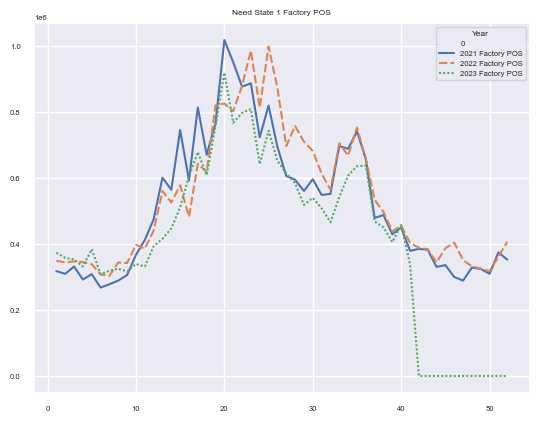

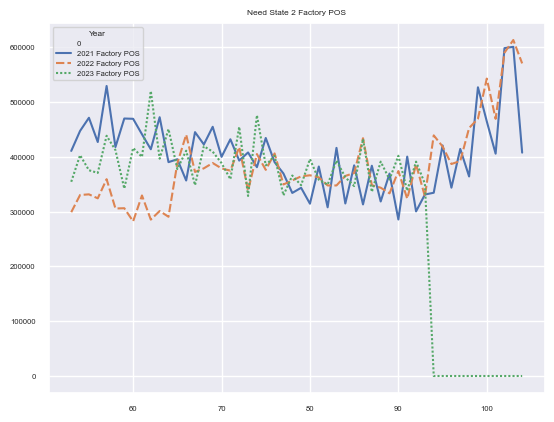

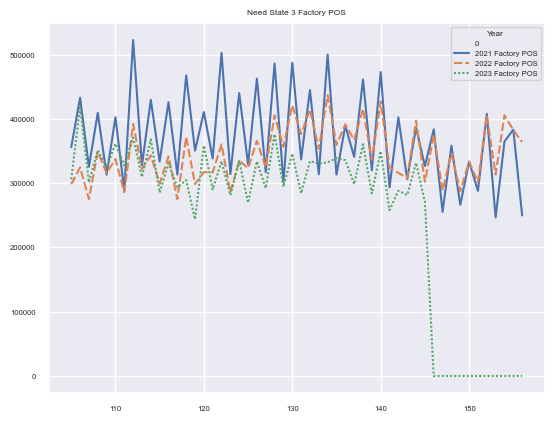

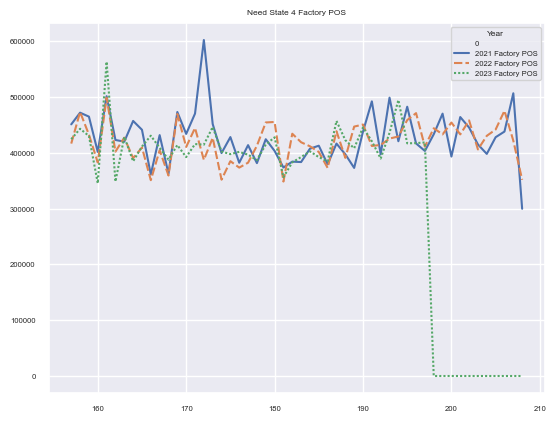

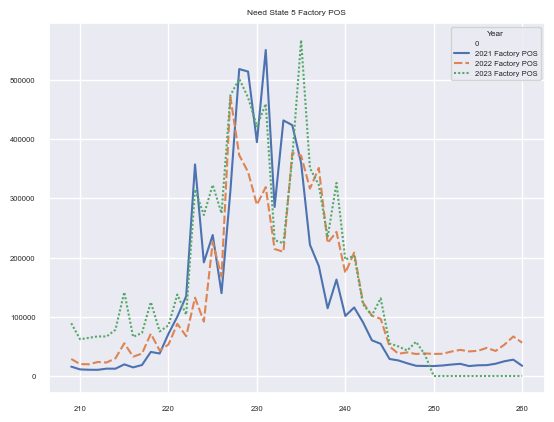

In [198]:
# plot yearly Factory POS values for each need state
sns.lineplot(data=fact_n1[['2021 Factory POS', '2022 Factory POS', '2023 Factory POS']]).set(title='Need State 1 Factory POS')
plt.legend(title='Year')
plt.show()
sns.lineplot(data=fact_n2[['2021 Factory POS', '2022 Factory POS', '2023 Factory POS']]).set(title='Need State 2 Factory POS')
plt.legend(title='Year')
plt.show()
sns.lineplot(data=fact_n3[['2021 Factory POS', '2022 Factory POS', '2023 Factory POS']]).set(title='Need State 3 Factory POS')
plt.legend(title='Year')
plt.show()
sns.lineplot(data=fact_n4[['2021 Factory POS', '2022 Factory POS', '2023 Factory POS']]).set(title='Need State 4 Factory POS')
plt.legend(title='Year')
plt.show()
sns.lineplot(data=fact_n5[['2021 Factory POS', '2022 Factory POS', '2023 Factory POS']]).set(title='Need State 5 Factory POS')
plt.legend(title='Year')
plt.show()


In [199]:
fact_n1 = fact_n1.T
fact_n2 = fact_n2.T
fact_n3 = fact_n3.T
fact_n4 = fact_n4.T
fact_n5 = fact_n5.T

#
## Comparing Factory POS across Need States for Each Year

#### Organizing Data by Fiscal Year

In [200]:
fact_pos.head

<bound method NDFrame.head of 0      Need State  Fiscal Week  2021 Factory POS  2022 Factory POS   
0      Need State  Fiscal Week           2021.00           2022.00  \
1    Need State 1            1         317435.25         348637.50   
2    Need State 1            2         309234.75         343799.25   
3    Need State 1            3         331149.00         346592.25   
4    Need State 1            4         291885.00         344795.25   
..            ...          ...               ...               ...   
308  Need State 6           48         482283.00         585123.75   
309  Need State 6           49         411926.25         540969.00   
310  Need State 6           50         428814.75         584413.50   
311  Need State 6           51         470064.75         581396.25   
312  Need State 6           52         373771.50         552392.25   

0    2023 Factory POS  
0             2023.00  
1           372921.75  
2           357329.25  
3           352571.25  
4        

In [201]:
fact_pos.head

<bound method NDFrame.head of 0      Need State  Fiscal Week  2021 Factory POS  2022 Factory POS   
0      Need State  Fiscal Week           2021.00           2022.00  \
1    Need State 1            1         317435.25         348637.50   
2    Need State 1            2         309234.75         343799.25   
3    Need State 1            3         331149.00         346592.25   
4    Need State 1            4         291885.00         344795.25   
..            ...          ...               ...               ...   
308  Need State 6           48         482283.00         585123.75   
309  Need State 6           49         411926.25         540969.00   
310  Need State 6           50         428814.75         584413.50   
311  Need State 6           51         470064.75         581396.25   
312  Need State 6           52         373771.50         552392.25   

0    2023 Factory POS  
0             2023.00  
1           372921.75  
2           357329.25  
3           352571.25  
4        

In [202]:
df_2021 = fact_pos.iloc[1:, :-2]
df_2022 = fact_pos.drop(["2021 Factory POS", "2023 Factory POS"], axis=1).iloc[1:, :]
df_2023 = fact_pos.drop(["2021 Factory POS", "2022 Factory POS"], axis=1).iloc[1:, :]


df_2023.head()

,Need State,Fiscal Week,2023 Factory POS
1,Need State 1,1,372921.75
2,Need State 1,2,357329.25
3,Need State 1,3,352571.25
4,Need State 1,4,331310.25
5,Need State 1,5,383741.25


In [203]:
for col in df_2023.columns:
    print(col)

Need State
Fiscal Week
2023 Factory POS


In [204]:
df_2021 = df_2021.pivot(index="Need State", columns="Fiscal Week", values="2021 Factory POS")
df_2021 = df_2021[sorted(df_2021.columns, key=lambda x: int(x))]
df_2021.head

df_2022 = df_2022.pivot(index="Need State", columns="Fiscal Week", values="2022 Factory POS")
df_2022 = df_2022[sorted(df_2022.columns, key=lambda x: int(x))]
df_2022.head

df_2023 = df_2023.pivot(index="Need State", columns="Fiscal Week", values="2023 Factory POS")
df_2023 = df_2023[sorted(df_2023.columns, key=lambda x: int(x))]
df_2023.head

<bound method NDFrame.head of Fiscal Week           1          2          3          4          5   
Need State                                                            
Need State 1  372921.75  357329.25  352571.25  331310.25  383741.25  \
Need State 2  354576.00  403224.75  375645.75  370831.50  438576.75   
Need State 3  306138.00  419254.50  301220.25  351375.75  324630.00   
Need State 4  424666.50  443360.25  430446.00  345584.25  563610.00   
Need State 5   89032.50   62028.00   64474.50   66874.50   66686.25   
Need State 6  501529.50  509521.50  446024.25  457716.00  527733.75   

Fiscal Week           6          7          8          9         10  ...   43   
Need State                                                           ...        
Need State 1  307953.75  318695.25  324699.75  316498.50  338994.75  ...  0.0  \
Need State 2  412379.25  342176.25  416317.50  399917.25  520320.00  ...  0.0   
Need State 3  361350.00  327872.25  370796.25  309635.25  367994.25  ...  0.0

#### Graphing Factory POS and Comparing the Need States by Fiscal Year

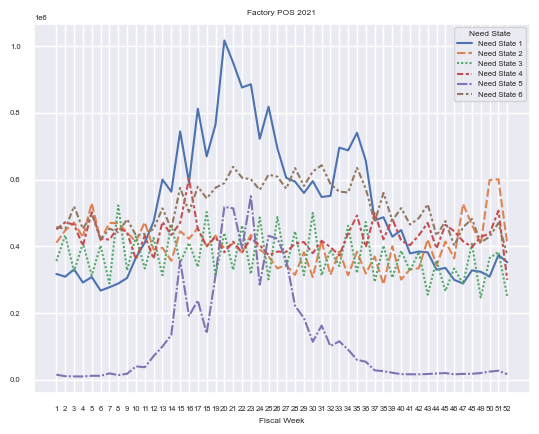

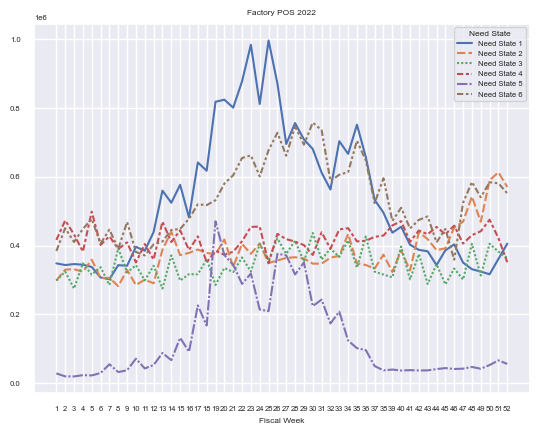

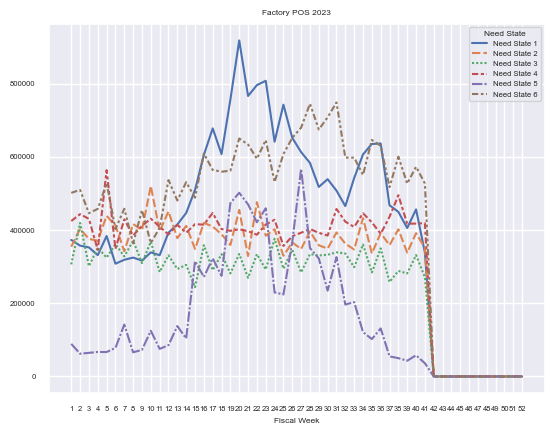

In [206]:
# FACTORY POS GRAPHS FOR 2021, 2022, 2023

sns.set(font_scale=0.5)
sns.lineplot(df_2021.T).set(title='Factory POS 2021')
plt.show()

sns.set(font_scale=0.5)
sns.lineplot(df_2022.T).set(title='Factory POS 2022')
plt.show()

sns.set(font_scale=0.5)
sns.lineplot(df_2023.T).set(title='Factory POS 2023')
plt.show()